In [1]:
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

%matplotlib inline

## What the heck does meshgrid do?

You give it a list of x coordinates and a list of y coordinates and it returns a "grid" containing every combination of x and y coordinate. It returns two 2-d arrays. The (i, j) element of the first array is the jth element of the x coords.  The (i, j) element of the second array is the ith element of the y array. That is the default 'xy' indexing of the function, where x is considered the columns and y the rows of the grid.

If x and y are integers, the output can be used to index into an array, creating an output grid containing the indexed elements. If x and y are not integers, they can be used by something like scipy.ndimage.map_coordinates to interpolate between values.

In [2]:

x = np.linspace(0, 1, 2)
y = np.linspace(1, 2, 2)
# z = np.linspace(2, 3, 2)
xx, yy = np.meshgrid(x, y, indexing='xy')
# xx, yy, zz = np.meshgrid(x, y, z, indexing='xy')

In [3]:
xx

array([[0., 1.],
       [0., 1.]])

In [4]:
yy

array([[1., 1.],
       [2., 2.]])

Example: index into a portion of a random array

In [5]:
r = np.random.randn(4, 4)
r

array([[-0.19897619, -1.14147681,  1.12297364, -2.0693767 ],
       [ 1.24923774, -1.74091393,  0.93663694, -0.52041844],
       [-0.80834227, -2.20936808,  0.64546626, -2.46703654],
       [-0.70890839,  0.27061851, -0.73788501,  2.48597211]])

In [6]:
r[xx.astype(int), yy.astype(int)]

array([[-1.14147681, -1.74091393],
       [ 1.12297364,  0.93663694]])

## Using `map_coordinates` to Stretch an Image

### Load a Test Image

In [7]:
image_path = Path('images/TCGA-A2-A0CM-DX1_xmin18562_ymin56852_MPP-0.2500_patch_xmin3584_ymin1024_xmax4096_ymax1536.png')

In [8]:
img = np.array(Image.open(image_path))
print(img.shape)

(512, 512, 3)


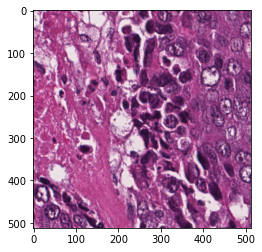

In [9]:
plt.imshow(img)

The image axes are (height, width, channels) 

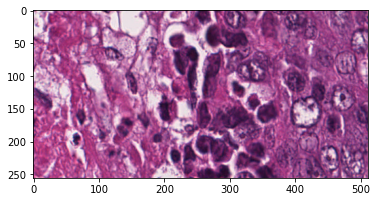

In [10]:
# Plot the top half of the image
plt.imshow(img[:img.shape[0] // 2, :])

Example: stretch the top left quadrant of the image to the size of the full image


(512, 512, 3) (512, 512, 3) (512, 512, 3)
(3, 512, 512, 3)


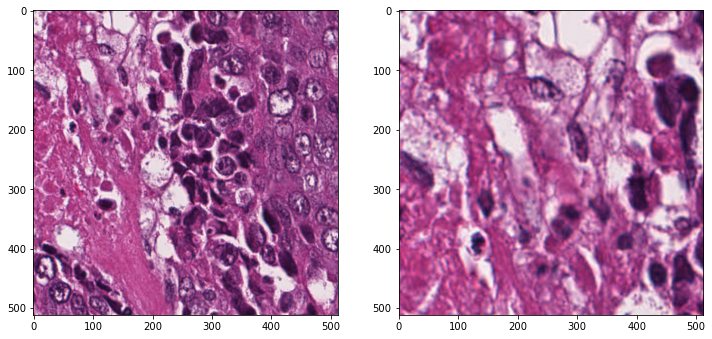

In [17]:
h, w, c = img.shape
# coordinates of the upper left quadrant, as arrays of length h and w.
x = np.linspace(0, h // 2, h)
y = np.linspace(0, w // 2, w)
z = np.arange(c) # use all 3 channels in the meshgrid
# create coordinate grids
xx, yy, zz = np.meshgrid(x, y, z, indexing='ij') # Use 'ij' b/c the image shape is (h, w), not (w, h)
print(xx.shape, yy.shape, zz.shape)
# put coordinates into the form that map_coordinates likes.
coords = np.stack([xx, yy, zz])
print(coords.shape)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img) # original image
ax[1].imshow(map_coordinates(img, coords)) # stretched upper left quadrant